In [12]:
import matplotlib.pyplot as plt

from hdf5storage import loadmat, savemat 

import numpy as np


In [13]:
# parameters for plotting
states4names=['Uncoupled','Leading','Following','Mutual']
color_4st=['green','red','blue','black']

In [16]:
# load syn_pcorr
outdict=loadmat('syn_pcorr.mat')
synch_pcorr=outdict["synch_pcorr"]
synco_pcorr=outdict["synco_pcorr"]
syn_pcorr=[synch_pcorr, synco_pcorr]


In [17]:
# convert syn_pcorr to boolean
nonzerosmat=np.zeros((2,4,30,32,32))
for syn in range(2):
	for condi in range(4):
		for freq in range(30):			
			nonzerosmat[syn][condi][freq,:,:]=np.array(syn_pcorr[syn][condi][freq,:,:],dtype=bool)

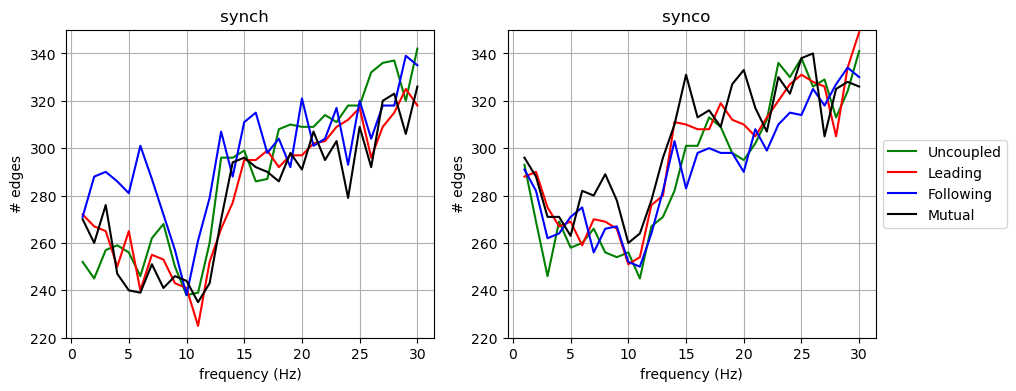

In [18]:
# 2 plots to look number of edges at all freq 
sum_allfreq=np.zeros((2,4,30))
for syn in range(2):
	for condi in range(4):
		for freq in range(30):	
			sum_allfreq[syn][condi][freq]=(np.sum(nonzerosmat[syn][condi][freq,:,:])-32)/2
 

fig, ax = plt.subplots(1,2,figsize=(4*2+4, 4))
for syn in range(2):
    plt.sca(ax[syn])
    for condi in range(4):
        plt.plot (np.arange(30)+1,sum_allfreq[syn][condi],color=color_4st[condi])
    plt.xlabel("frequency (Hz)")
    plt.ylabel("# edges")
    plt.ylim(220,350)
    if syn==0: plt.title('synch  ')
    if syn==1: plt.title('synco  ')
    plt.grid(); 
        

fig.subplots_adjust(right=0.8)
plt.legend(states4names,ncol=1,loc='center left', bbox_to_anchor=(1, 0.5))


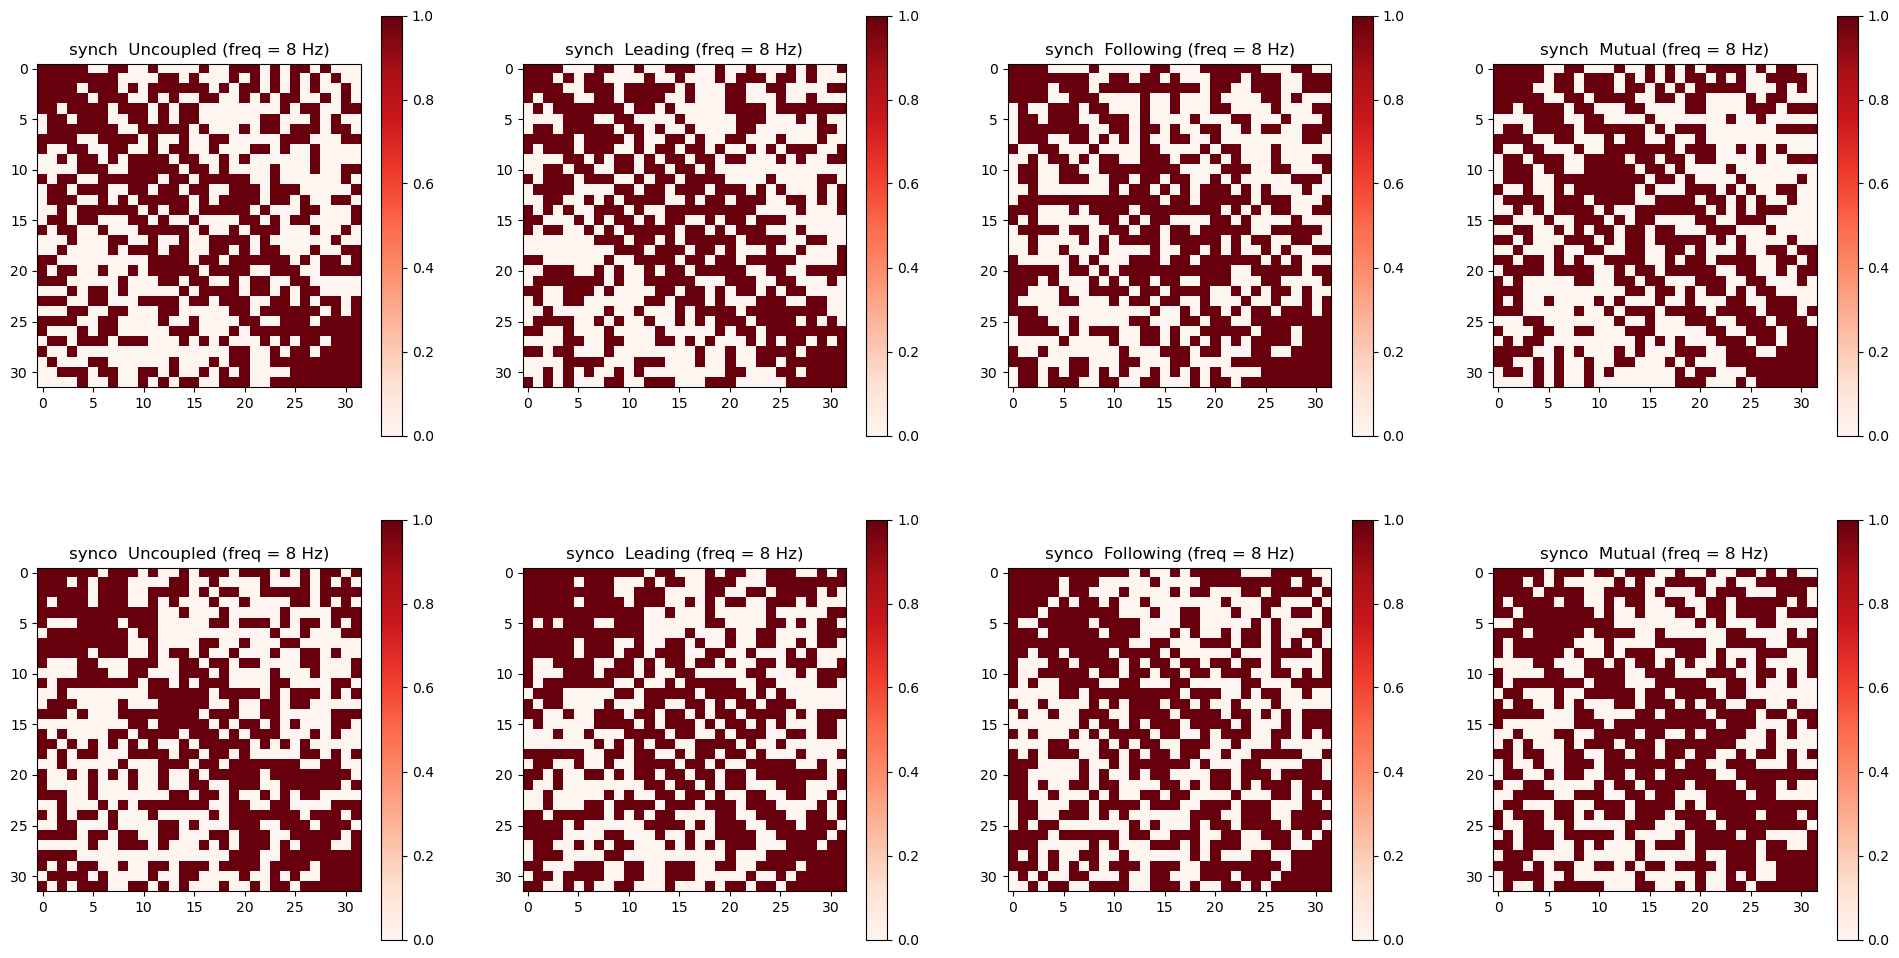

In [19]:
# 8 plots at a selected a freq to examine the distribution
freq=8
fig, ax = plt.subplots(2,4,figsize=(6*4, 6*2))
for syn in range(2):
    for condi in range(4):
        plt.sca(ax[syn,condi])
        plt.imshow(nonzerosmat[syn][condi,freq,:,:],vmin = 0,vmax = 1,cmap = 'Reds')
        plt.colorbar()
        if syn==0: plt.title('synch  '+states4names[condi] + ' (freq = ' + str(freq) +' Hz)')
        if syn==1: plt.title('synco  '+states4names[condi] + ' (freq = ' + str(freq) +' Hz)')

In [11]:
# load chan locs for topoplots
dict_loc=loadmat('chan_locs/xyzlabels.mat')
x=dict_loc['x']
y=dict_loc['y']
z=dict_loc['z']
labels=dict_loc['labels']

# coords for nilearn
coords=np.zeros((32,3))
for i in range(32):
    coords[i,:]=[x[i], y[i], z[i]]

#  construct text for networkx labels
labeldict = {}
for i in range(32):
    labeldict[i]=labels[i]

# load pos for networkx
pos_mat=loadmat('chan_locs/pos.mat')
pos=pos_mat['pos']